<a href="https://colab.research.google.com/github/SonDongBin/python-file/blob/master/RNN_220705.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
!wget http://www.manythings.org/anki/fra-eng.zip

--2022-07-05 02:54:34--  http://www.manythings.org/anki/fra-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6612164 (6.3M) [application/zip]
Saving to: ‘fra-eng.zip.3’

fra-eng.zip.3       100%[===================>]   6.31M  10.1MB/s    in 0.6s    

2022-07-05 02:54:34 (10.1 MB/s) - ‘fra-eng.zip.3’ saved [6612164/6612164]



In [3]:
lines = pd.read_csv('./fra.txt', names=['src', 'tar', 'lic'], sep='\t')
lines

,src,tar,lic
0,Go.,Va !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Go.,Marche.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Go.,Bouge !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Hi.,Salut !,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
4,Hi.,Salut.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
...,...,...,...
194508,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
194509,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
194510,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
194511,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


In [4]:
for i in lines.src.iloc[-5:]:
  print(i)
  print('문장의 길이: ', len(i))

A carbon footprint is the amount of carbon dioxide pollution that we produce as a result of our activities. Some people try to reduce their carbon footprint because they are concerned about climate change.
문장의 길이:  205
Death is something that we're often discouraged to talk about or even think about, but I've realized that preparing for death is one of the most empowering things you can do. Thinking about death clarifies your life.
문장의 길이:  216
Since there are usually multiple websites on any given topic, I usually just click the back button when I arrive on any webpage that has pop-up advertising. I just go to the next page found by Google and hope for something less irritating.
문장의 길이:  239
If someone who doesn't know your background says that you sound like a native speaker, it means they probably noticed something about your speaking that made them realize you weren't a native speaker. In other words, you don't really sound like a native speaker.
문장의 길이:  262
It may be impossible t

In [5]:
lines['length_src'] = lines.src.apply(lambda x:len(x))
lines['length_tar'] = lines.tar.apply(lambda x:len(x))

In [6]:
lines

,src,tar,lic,length_src,length_tar
0,Go.,Va !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,4
1,Go.,Marche.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,7
2,Go.,Bouge !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,7
3,Hi.,Salut !,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,3,7
4,Hi.,Salut.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,3,6
...,...,...,...,...,...
194508,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...,205,227
194509,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...,216,263
194510,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...,239,305
194511,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...,262,325


src 평균: 30.3
src 중앙값:  28.0
src 최대값:  286


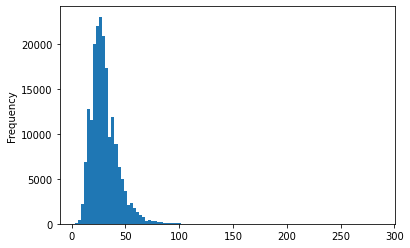

In [7]:
print('src 평균: %.1f' %(lines.length_src.mean()))
print('src 중앙값: ', lines.length_src.median())
print('src 최대값: ', lines.length_src.max())
lines.length_src.plot(kind='hist', bins=100)

tar 평균: 35.8
tar 중앙값:  33.0
tar 최대값:  349


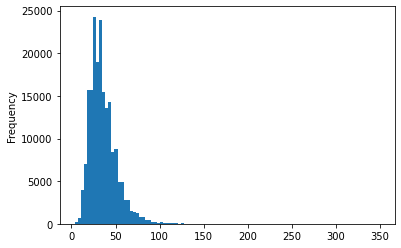

In [8]:
print('tar 평균: %.1f' %(lines.length_tar.mean()))
print('tar 중앙값: ', lines.length_tar.median())
print('tar 최대값: ', lines.length_tar.max())
lines.length_tar.plot(kind='hist', bins=100)

In [9]:
lines.sample(10)

,src,tar,lic,length_src,length_tar
151521,Don't forget to change the cat litter.,N'oublie pas de changer la litière du chat.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,38,43
174118,Camels are often used to travel in the desert.,Les dromadaires sont souvent utilisés pour voy...,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,46,66
148730,I watched TV for two hours yesterday.,J'ai regardé la télévision pendant deux heures...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...,37,53
45944,We're not your enemy.,Nous ne sommes pas tes ennemis.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,21,31
94695,I want you to be my partner.,Je veux que tu sois mon compagnon.,CC-BY 2.0 (France) Attribution: tatoeba.org #1...,28,34
157971,They knew how much danger they'd be in.,Elles savaient quels dangers elles encouraient.,CC-BY 2.0 (France) Attribution: tatoeba.org #3...,39,47
124048,She went with him to the movies.,Elle s'est rendue avec lui au cinéma.,CC-BY 2.0 (France) Attribution: tatoeba.org #8...,32,37
178207,"If Tom has a problem with me, he should tell me.","Si Tom a un problème avec moi, qu'il me le dise.",CC-BY 2.0 (France) Attribution: tatoeba.org #2...,48,48
135958,They accused him of telling a lie.,Ils l'accusèrent de dire un mensonge.,CC-BY 2.0 (France) Attribution: tatoeba.org #3...,34,37
169437,There are way too many people in this room.,Il y a beaucoup trop de personnes dans cette p...,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,43,51


In [10]:
lines_30 = lines.loc[lines.length_src <= 30]

In [11]:
lines_30.shape

(113350, 5)

In [12]:
lines_30 = lines_30.reset_index()

In [13]:
lines_30

,index,src,tar,lic,length_src,length_tar
0,0,Go.,Va !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,4
1,1,Go.,Marche.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,7
2,2,Go.,Bouge !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,3,7
3,3,Hi.,Salut !,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,3,7
4,4,Hi.,Salut.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,3,6
...,...,...,...,...,...,...
113345,119977,"Do you like cake? ""Yes, I do.""","«Aimez-vous les gâteaux ?» «Oui, j'aime ça.»",CC-BY 2.0 (France) Attribution: tatoeba.org #7...,30,44
113346,119978,"Have you eaten? ""Yes, I have.""",« As-tu mangé ? » « Oui. »,CC-BY 2.0 (France) Attribution: tatoeba.org #6...,30,26
113347,119979,"Have you eaten? ""Yes, I have.""",« Avez-vous mangé ? » « Oui. »,CC-BY 2.0 (France) Attribution: tatoeba.org #6...,30,30
113348,119980,"How's it going? ""Not too bad.""",« Comment ça va ? » « Pas trop mal. »,CC-BY 2.0 (France) Attribution: tatoeba.org #4...,30,37


In [14]:
lines_30.columns

Index(['index', 'src', 'tar', 'lic', 'length_src', 'length_tar'], dtype='object')

In [15]:
lines_30.drop(['index', 'lic', 'length_src', 'length_tar'], axis=1, inplace=True)

In [16]:
lines_30.sample(10)

,src,tar
22274,You're very good.,Tu es très bonne.
21804,Who's the author?,Qui est l'auteur ?
97182,Those were his actual words.,Ce furent ses paroles exactes.
37501,She is hard on them.,Elle est dure avec eux.
19956,People are dying.,Des gens meurent.
78699,I realized I couldn't win.,J'ai pris conscience que je ne pouvais l'empor...
67214,We're having a barbecue.,Nous faisons des grillades en ce moment.
63223,I have an older brother.,J'ai un frère aîné.
33756,You're out of luck.,Ta chance est épuisée.
33401,You can rely on me.,Tu peux me faire confiance.


In [17]:
# <sos> : \t
# <eos> : \n
lines_30['tar'] = lines_30.tar.apply(lambda x: '\t ' + x + ' \n')

In [18]:
lines_30.sample(10)

,src,tar
92713,He is roasting coffee beans.,\t Il torréfie des fèves de café. \n
14147,I live here now.,"\t Je vis ici, à l'heure actuelle. \n"
35679,I hope you're wrong.,\t J'espère que vous avez tort. \n
56459,I saw it in a magazine.,\t Je l'ai vu dans un magazine. \n
13040,Are you unlucky?,\t Êtes-vous malchanceux ? \n
56805,I woke up on the couch.,\t Je me suis réveillé sur le canapé. \n
71993,I'm so happy to meet you.,\t Je suis si heureux de te rencontrer. \n
104438,This is what we want to know.,\t C’est ce que nous voulons savoir. \n
71572,I will have to help them.,\t Je devrai les aider. \n
3632,Look at Tom.,\t Regarde Tom. \n


In [19]:
src_vocab = set()
for line in lines_30.src:
  for char in line:
    src_vocab.add(char)

tar_vocab = set()
for line in lines_30.tar:
  for char in line:
    tar_vocab.add(char)

In [20]:
print('src_vocab', '\n', src_vocab)
print('src_vocab length: ', len(src_vocab))
print('tar_vocab', '\n', tar_vocab)
print('tar_vocab length: ', len(tar_vocab))

src_vocab 
 {'Y', '%', '.', '4', 'F', 'f', 'w', 'c', 'y', ',', "'", '8', 'e', '€', 'G', 'V', 's', 'é', 'a', 'U', 'l', '?', 'm', 'h', 'S', 'T', '/', '"', '1', '0', 'u', 'J', 'K', '&', 'n', ' ', 'O', 'x', 'q', 'X', 'A', '3', '’', ':', 'p', 'k', '\xa0', '‘', 'r', '6', 'o', 'R', 'P', 'z', '-', 'I', 't', 'i', 'E', 'M', '!', 'd', '$', 'H', 'b', 'Q', '7', 'D', '5', 'v', 'L', 'j', 'B', 'C', '2', 'W', 'Z', 'N', '9', '°', 'g'}
src_vocab length:  81
tar_vocab 
 {'Y', '%', '.', '4', 'F', 'f', 'w', 'c', 'y', ',', "'", 'ù', 'œ', 'ï', '8', 'e', 'V', 'G', 's', 'é', 'a', 'U', 'l', '?', 'ê', '(', 'm', 'h', 'S', 'T', '"', '1', 'û', '0', 'u', 'J', 'K', 'â', '&', 'n', ' ', 'O', '«', 'x', 'q', 'è', 'X', 'A', '3', '’', 'ü', ':', 'p', 'k', 'Ç', '\xa0', '\u202f', '‘', 'r', '6', 'o', 'R', '+', 'P', 'z', '-', 'Ô', 'I', 't', 'ë', 'i', 'E', 'À', ')', 'Ê', 'M', '!', 'd', '$', '\u200b', 'b', 'à', 'Q', '7', 'D', '5', 'v', 'L', 'j', 'B', '»', 'C', 'g', 'î', 'É', '\n', '2', '‽', 'W', '\u2009', 'Z', 'N', '9', 'ç', '\t',

In [21]:
src_vocab_size = len(src_vocab) + 1
tar_vocab_size = len(tar_vocab) + 1
print('src_vocab_size: ', src_vocab_size)
print('tar_vocab_size: ', tar_vocab_size)

src_vocab_size:  82
tar_vocab_size:  108


In [22]:
src_vocab = sorted(src_vocab)
tar_vocab = sorted(tar_vocab)

In [23]:
print(src_vocab[50:75])
print(tar_vocab[50:75])

['b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
['X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v']


In [24]:
print(src_vocab[:2])
print(tar_vocab[:2])

[' ', '!']
['\t', '\n']


In [25]:
# dict([('a', 'b')])
src_to_index = dict([(word, i+1) for i, word in enumerate(src_vocab)])
tar_to_index = dict([(word, i+1) for i, word in enumerate(tar_vocab)])

In [26]:
print(src_to_index)
print(tar_to_index)

{' ': 1, '!': 2, '"': 3, '$': 4, '%': 5, '&': 6, "'": 7, ',': 8, '-': 9, '.': 10, '/': 11, '0': 12, '1': 13, '2': 14, '3': 15, '4': 16, '5': 17, '6': 18, '7': 19, '8': 20, '9': 21, ':': 22, '?': 23, 'A': 24, 'B': 25, 'C': 26, 'D': 27, 'E': 28, 'F': 29, 'G': 30, 'H': 31, 'I': 32, 'J': 33, 'K': 34, 'L': 35, 'M': 36, 'N': 37, 'O': 38, 'P': 39, 'Q': 40, 'R': 41, 'S': 42, 'T': 43, 'U': 44, 'V': 45, 'W': 46, 'X': 47, 'Y': 48, 'Z': 49, 'a': 50, 'b': 51, 'c': 52, 'd': 53, 'e': 54, 'f': 55, 'g': 56, 'h': 57, 'i': 58, 'j': 59, 'k': 60, 'l': 61, 'm': 62, 'n': 63, 'o': 64, 'p': 65, 'q': 66, 'r': 67, 's': 68, 't': 69, 'u': 70, 'v': 71, 'w': 72, 'x': 73, 'y': 74, 'z': 75, '\xa0': 76, '°': 77, 'é': 78, '‘': 79, '’': 80, '€': 81}
{'\t': 1, '\n': 2, ' ': 3, '!': 4, '"': 5, '$': 6, '%': 7, '&': 8, "'": 9, '(': 10, ')': 11, '+': 12, ',': 13, '-': 14, '.': 15, '0': 16, '1': 17, '2': 18, '3': 19, '4': 20, '5': 21, '6': 22, '7': 23, '8': 24, '9': 25, ':': 26, '?': 27, 'A': 28, 'B': 29, 'C': 30, 'D': 31, 'E'

In [27]:
src_to_index['a']

50

In [28]:
encoder_input = []

for line in lines_30.src:
  encoded_line = []
  for char in line:
    encoded_line.append(src_to_index[char])
  encoder_input.append(encoded_line)

In [29]:
print('src 문장 인코딩: ', encoder_input[:5])
print('src 문장 원본  : ', '\n', lines_30.src[:5])

src 문장 인코딩:  [[30, 64, 10], [30, 64, 10], [30, 64, 10], [31, 58, 10], [31, 58, 10]]
src 문장 원본  :  
 0    Go.
1    Go.
2    Go.
3    Hi.
4    Hi.
Name: src, dtype: object


In [30]:
print('src 문장 인코딩 last : ', encoder_input[-1])

src 문장 인코딩 last :  [46, 57, 64, 1, 58, 68, 1, 58, 69, 23, 1, 3, 32, 69, 7, 68, 1, 74, 64, 70, 67, 1, 62, 64, 69, 57, 54, 67, 10, 3]


In [31]:
decoder_input = []

for line in lines_30.tar:
  decoded_line = []
  for char in line:
    decoded_line.append(tar_to_index[char])
  decoder_input.append(decoded_line)

In [32]:
print('tar 문장 인코딩: ', decoder_input[:5])
print('tar 문장 원본  : ', '\n', lines_30.tar[:5])

tar 문장 인코딩:  [[1, 3, 49, 54, 3, 4, 3, 2], [1, 3, 40, 54, 71, 56, 61, 58, 15, 3, 2], [1, 3, 29, 68, 74, 60, 58, 3, 4, 3, 2], [1, 3, 46, 54, 65, 74, 73, 3, 4, 3, 2], [1, 3, 46, 54, 65, 74, 73, 15, 3, 2]]
tar 문장 원본  :  
 0       \t Va ! \n
1    \t Marche. \n
2    \t Bouge ! \n
3    \t Salut ! \n
4     \t Salut. \n
Name: tar, dtype: object


In [33]:
decoder_target = []

for line in lines_30.tar:
  timestep = 0
  encoded_line = []
  for char in line:
    if timestep > 0:
      encoded_line.append(tar_to_index[char])
    timestep += 1
  decoder_target.append(encoded_line)

In [34]:
print(encoder_input[:5])
print(decoder_input[:5])
print(decoder_target[:5])

[[30, 64, 10], [30, 64, 10], [30, 64, 10], [31, 58, 10], [31, 58, 10]]
[[1, 3, 49, 54, 3, 4, 3, 2], [1, 3, 40, 54, 71, 56, 61, 58, 15, 3, 2], [1, 3, 29, 68, 74, 60, 58, 3, 4, 3, 2], [1, 3, 46, 54, 65, 74, 73, 3, 4, 3, 2], [1, 3, 46, 54, 65, 74, 73, 15, 3, 2]]
[[3, 49, 54, 3, 4, 3, 2], [3, 40, 54, 71, 56, 61, 58, 15, 3, 2], [3, 29, 68, 74, 60, 58, 3, 4, 3, 2], [3, 46, 54, 65, 74, 73, 3, 4, 3, 2], [3, 46, 54, 65, 74, 73, 15, 3, 2]]


In [35]:
# lines_100.tar.apply(lambda x: x[1:])

In [36]:
max_src_len = max([len(line) for line in lines_30.src])
max_tar_len = max([len(line) for line in lines_30.tar])
print('max_src_len: ', max_src_len)
print('max_tar_len: ', max_tar_len)

max_src_len:  30
max_tar_len:  80


In [37]:
encoder_input = pad_sequences(encoder_input, maxlen=max_src_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen=max_tar_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen=max_tar_len, padding='post')

In [38]:
print(encoder_input[0])
print(len(encoder_input[0]))
print(decoder_input[0])
print(len(decoder_input[0]))
print(decoder_target[0])
print(len(decoder_target[0]))

[30 64 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
30
[ 1  3 49 54  3  4  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]
80
[ 3 49 54  3  4  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]
80


In [39]:
encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)

In [41]:
print('encoder input dim: ', encoder_input.shape)
print('number of samples: ', lines_30.shape[0])
print('src_vocab_size: ', src_vocab_size)
print('max_src_len: ', max_src_len)
print('-'*40)
print('decoder input dim: ', decoder_input.shape)
print('number of samples: ', lines_30.shape[0])
print('tar_vocab_size: ', tar_vocab_size)
print('max_tar_len: ', max_tar_len)
print('-'*40)
print('decoder target dim: ', decoder_target.shape)

encoder input dim:  (113350, 30, 82)
number of samples:  113350
src_vocab_size:  82
max_src_len:  30
----------------------------------------
decoder input dim:  (113350, 80, 108)
number of samples:  113350
tar_vocab_size:  108
max_tar_len:  80
----------------------------------------
decoder target dim:  (113350, 80, 108)


In [42]:
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
import numpy as np

In [43]:
print(Input(82))
print(Input(shape=(82)))
print(Input(shape=(None, src_vocab_size)))

KerasTensor(type_spec=TensorSpec(shape=(None, 82), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 82), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 82), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


In [45]:
encoder_input_test = Input(82)
encoder_input = Input(shape=(None, src_vocab_size))

In [47]:
print(LSTM(units=256)(encoder_input))
print(LSTM(units=256, return_sequences=True, return_state=False)(encoder_input))
print(LSTM(units=256, return_sequences=False, return_state=True)(encoder_input))
print(LSTM(units=256, return_sequences=True, return_state=True)(encoder_input))

KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_1/PartitionedCall:0', description="created by layer 'lstm_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 256), dtype=tf.float32, name=None), name='lstm_2/PartitionedCall:1', description="created by layer 'lstm_2'")
[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_3')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_3')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_3')>]
[<KerasTensor: shape=(None, None, 256) dtype=float32 (created by layer 'lstm_4')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_4')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_4')>]


In [48]:
print(SimpleRNN(256, return_sequences=True)(encoder_input))

KerasTensor(type_spec=TensorSpec(shape=(None, None, 256), dtype=tf.float32, name=None), name='simple_rnn/transpose_1:0', description="created by layer 'simple_rnn'")


In [ ]:
# print(LSTM(units=256)(encoder_input_test)) error 발색

In [ ]:
print('2 states_value (인코더 모델 히든, 셀 상태 출력을 예측 시 입력)')
print('' 75)
print('states_value:', '\n', states_value)
print('len(states_value):', len(states_value))
print('' 75)
print('2.1 히든 상태값 (state_value[0])')
print('-' * 70)
print(states_value[0])
print('states_value[0].shape:', states_value[0].shape)
print('-' * 70, '\n')

print('2.2 셀 상태값 (state_value[1])')
print('-' * 70)
print(states_value[1])
print('states_value[1].shape:', states_value[1].shape)
print('-' * 70, '\n')

In [ ]:
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 상태를 얻음
  states_value = encoder_model.predict(input_seq)

  # <SOS>에 해당하는 원-핫 벡터 생성
  target_seq = np.zeros((1, 1, tar_vocab_size))
  target_seq[0, 0, tar_to_index['\t']] = 1.

  stop_condition = False
  decoded_sentence = ""

  # stop_condition이 True가 될 때까지 루프 반복
  while not stop_condition:
    # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
    output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

    # 예측 결과를 문자로 변환
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_char = index_to_tar[sampled_token_index]

    # 현재 시점의 예측 문자를 예측 문장에 추가
    decoded_sentence += sampled_char

    # <eos>에 도달하거나 최대 길이를 넘으면 중단.
    if (sampled_char == '\n' or
        len(decoded_sentence) > max_tar_len):
        stop_condition = True

    # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
    target_seq = np.zeros((1, 1, tar_vocab_size))
    target_seq[0, 0, sampled_token_index] = 1.

    # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
    states_value = [h, c]

  return decoded_sentence